In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import networkx as nx

In [3]:
### Chicago Census Tract Boundaries
filename = 'data/Boundaries - City/geo_export_5f554ba9-0da0-4deb-91a0-6c6eec7355c5.shp'
tract_df = gpd.read_file(filename)
tract_df.to_crs('epsg:4326')


,name,objectid,shape_area,shape_len,geometry
0,CHICAGO,1.0,6.450277e+09,845282.931362,"MULTIPOLYGON (((-87.93514 42.00089, -87.93521 ..."


In [4]:
filename = 'data/Boundaries - Census Tracts - 2010-2/geo_export_956feb14-3473-4b2f-9559-8084b55ff017.shp'
tracts_df = gpd.read_file(filename)
tracts_df.to_crs('epsg:4326')


,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730..."
1,59,59.0,031,17031840300,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823..."
2,34,34.0,031,17031841100,8411,Census Tract 8411,None,17,841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852..."
3,31,31.0,031,17031841200,8412,Census Tract 8412,None,17,841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856..."
4,32,32.0,031,17031839000,8390,Census Tract 8390,None,17,839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874..."
...,...,...,...,...,...,...,...,...,...,...
796,7,7.0,031,17031070400,704,Census Tract 704,None,17,070400,"POLYGON ((-87.65746 41.93258, -87.65722 41.932..."
797,7,7.0,031,17031070500,705,Census Tract 705,None,17,070500,"POLYGON ((-87.66349 41.93036, -87.66350 41.930..."
798,13,13.0,031,17031130300,1303,Census Tract 1303,None,17,130300,"POLYGON ((-87.71436 41.98300, -87.71472 41.982..."
799,29,29.0,031,17031292200,2922,Census Tract 2922,None,17,292200,"POLYGON ((-87.71317 41.85523, -87.71357 41.855..."


In [5]:
filename = 'data/Boundaries - ZIP Codes/geo_export_f8d86540-494c-4589-b6fe-011a8e48a2a7.shp'
tractz_df = gpd.read_file(filename)
tractz_df.to_crs('epsg:4326')


,objectid,shape_area,shape_len,zip,geometry
0,33.0,1.060523e+08,42720.044406,60647,"POLYGON ((-87.67762 41.91776, -87.67761 41.917..."
1,34.0,1.274761e+08,48103.782721,60639,"POLYGON ((-87.72683 41.92265, -87.72693 41.922..."
2,35.0,4.506904e+07,27288.609612,60707,"POLYGON ((-87.78500 41.90915, -87.78531 41.909..."
3,36.0,7.085383e+07,42527.989679,60622,"POLYGON ((-87.66707 41.88885, -87.66707 41.888..."
4,37.0,9.903962e+07,47970.140153,60651,"POLYGON ((-87.70656 41.89555, -87.70672 41.895..."
...,...,...,...,...,...
56,57.0,1.552855e+08,53406.915617,60623,"POLYGON ((-87.69479 41.83008, -87.69486 41.830..."
57,58.0,2.111148e+08,58701.325375,60629,"POLYGON ((-87.68306 41.75786, -87.68306 41.757..."
58,59.0,2.116961e+08,58466.160298,60620,"POLYGON ((-87.62373 41.72167, -87.62388 41.721..."
59,60.0,1.254243e+08,52377.854541,60637,"POLYGON ((-87.57691 41.79511, -87.57700 41.795..."


In [6]:
chicago_nodes = pd.read_csv('final_output_node_primary+motorway+ev.csv')
chicago_edges = pd.read_csv('final_output_edge_primary+motorway.csv')

In [7]:
import geopandas as gpd
from shapely.geometry import LineString
from shapely import wkt

chicago_nodes['geometry'] = chicago_nodes['geometry'].apply(wkt.loads)
gdf_chicago_nodes = gpd.GeoDataFrame(chicago_nodes, crs='epsg:4326')

chicago_edges['front'] = chicago_edges['front'].apply(wkt.loads)
chicago_edges['rear'] = chicago_edges['rear'].apply(wkt.loads)

chicago_edges['geometry'] = chicago_edges.apply(lambda row: LineString([row['front'], row['rear']]), axis=1) #Create a linestring column
gdf_chicago_edges = gpd.GeoDataFrame(chicago_edges, crs='epsg:4326')

/Users/denissapurba/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [8]:
gdf_chicago_nodes.head()

,osmid,node,y,x,flow,station,gas_flow,ev_flow,tesla_flow,level2,dcfc,dcfc_tesla,geometry
0,26794540,1,41.954667,-87.644162,1,0,5320,86,37,0,0,0,POINT (-87.64416 41.95467)
1,26794541,2,41.875766,-87.624182,1,1,9552,207,89,10,0,0,POINT (-87.62418 41.87577)
2,27721250,3,41.892529,-87.624125,1,1,9531,268,115,42,0,4,POINT (-87.62413 41.89253)
3,29145417,4,41.784573,-87.741260,1,0,7349,11,5,0,0,0,POINT (-87.74126 41.78457)
4,33404757,5,41.852932,-87.623812,1,1,0,0,0,6,0,0,POINT (-87.62381 41.85293)


In [9]:
# Type of Nodes

## Evacuee
gdf_evacuee =gdf_chicago_nodes[gdf_chicago_nodes['level2']==0]
gdf_evacuee =gdf_evacuee[gdf_evacuee['dcfc_tesla']==0]

## Shelters
shelter = [93,71,63,80,79]
gdf_shelter = gdf_chicago_nodes[gdf_chicago_nodes['node'].isin(shelter)]

## Stations
gdf_public_st = gdf_chicago_nodes[gdf_chicago_nodes['level2']>0]
gdf_public_st = gdf_public_st[gdf_public_st['dcfc_tesla']==0]
gdf_tesla_st = gdf_chicago_nodes[gdf_chicago_nodes['dcfc_tesla']>0]
gdf_tesla_st = gdf_tesla_st[gdf_tesla_st['level2']==0]
gdf_all_st = gdf_chicago_nodes[gdf_chicago_nodes['level2']>0]
gdf_all_st = gdf_all_st[gdf_all_st['dcfc_tesla']>0]

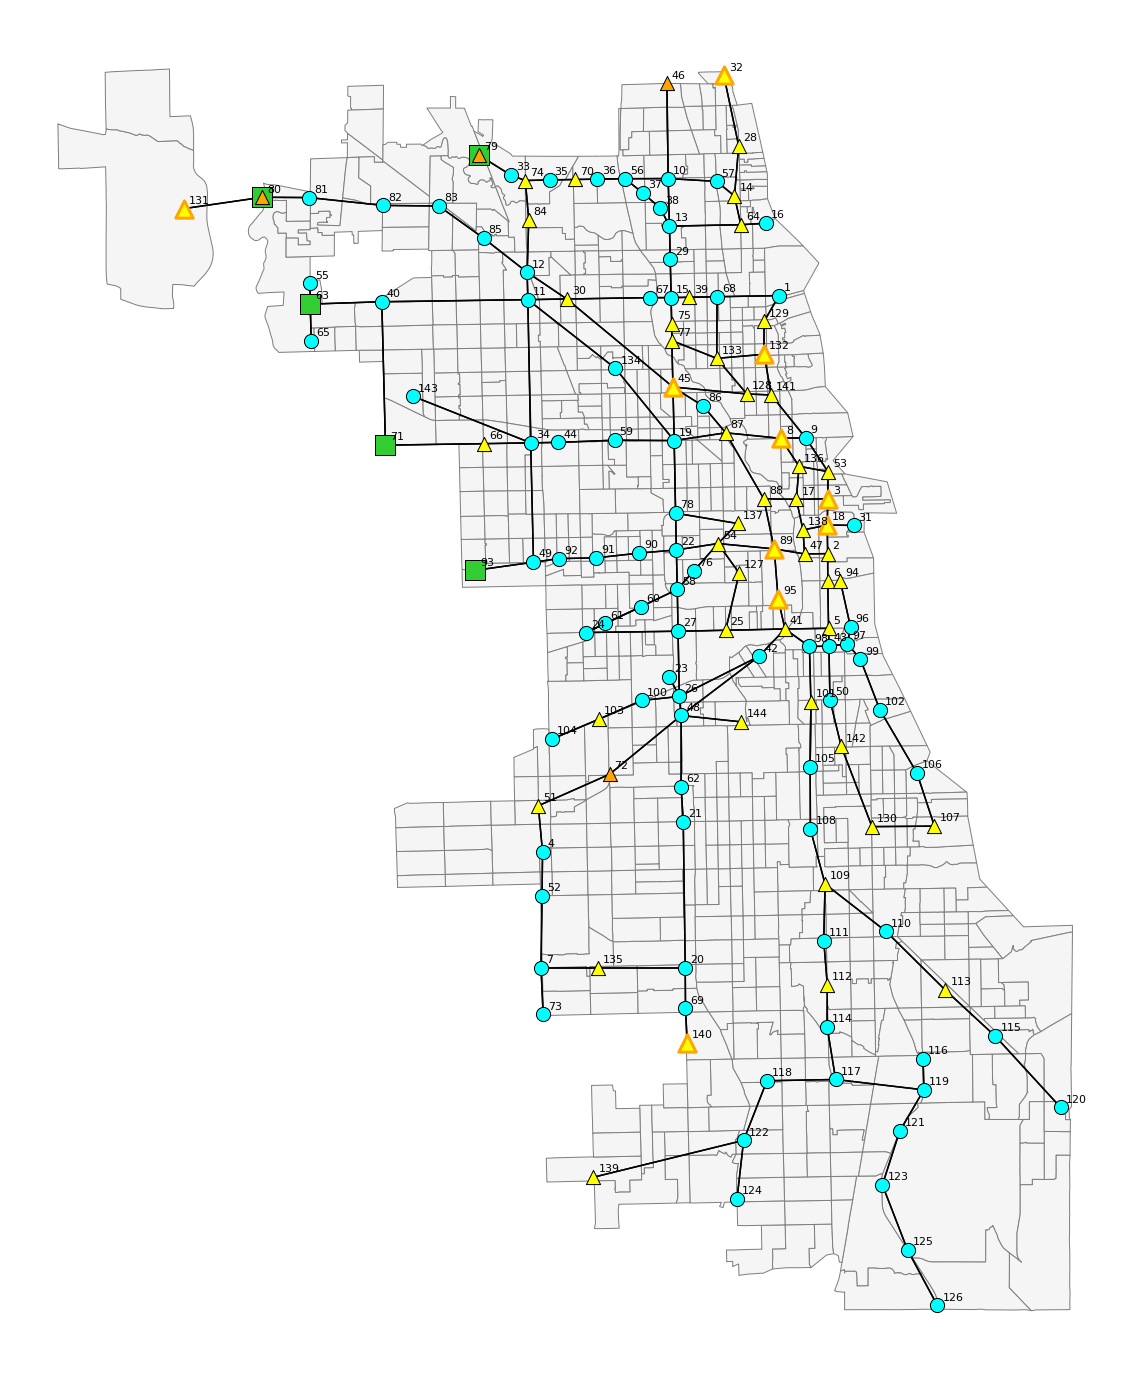

In [10]:
ax = tracts_df.plot(color='#f5f5f5', edgecolor='#808080',figsize = (20,40))
plt.rcParams['figure.dpi'] = 200

gdf_chicago_edges.plot(ax=ax, color = 'k', linewidth=1.5)
gdf_evacuee.plot(ax=ax, markersize = 200, marker = 'o', edgecolor='k', color='#00FFFF',zorder=2)
gdf_shelter.plot(ax = ax, markersize = 400, color='#32CD32', marker = 's', zorder=2,  edgecolor='k')
gdf_tesla_st.plot(ax = ax, markersize = 200, color='orange', marker = '^', zorder=2,  edgecolor='k')
gdf_public_st.plot(ax = ax, markersize = 200, color='yellow', marker = '^', zorder=2,  edgecolor='k')
gdf_all_st.plot(ax = ax, markersize = 300, color='yellow', marker = '^', zorder=2,  edgecolor='orange', linewidth=3)


for x, y, label in zip(gdf_chicago_nodes.geometry.x, gdf_chicago_nodes.geometry.y, gdf_chicago_nodes.node):
    ax.annotate(label, xy=(x, y), xytext=(5, 5), textcoords="offset points", fontsize = 11)

ax.axis("off")
plt.show()

In [11]:
len(gdf_chicago_edges)

354

In [12]:
len(gdf_chicago_nodes)

144

In [73]:
chicago_edges['length'] = gdf_chicago_edges.to_crs(3857).length*0.000621371
#distance in mile

In [573]:
gdf_chicago_nodes.to_csv('final_output_node_primary+motorway+ev.csv')
gdf_chicago_edges.to_csv('final_output_edge_primary+motorway.csv')

In [74]:
chicago_edges

,u,v,start,end,length_mile,speed_mph,t0_min,lanes,capacity,front,...,oneway,highway,reversed,geometry,lanes.1,ref,name,maxspeed,bridge,length
0,26794540,4332536241,1,68,1.759543,30,3.519086,3,5700,POINT (-87.6441624 41.9546674),...,False,primary,TRUE,"LINESTRING (-87.6441624 41.9546674, -87.669595...","['3', '1', '5', '4']",IL 19,West Irving Park Road,NaN,NaN,1.759543
1,26794541,33754408,2,6,0.767399,30,1.534798,3,5700,POINT (-87.6241823 41.8757659),...,True,primary,FALSE,"LINESTRING (-87.6241823 41.8757659, -87.624137...","['3', '4']",NaN,South Michigan Avenue,NaN,NaN,0.767399
2,29145417,538527489,4,51,1.312941,30,2.625882,3,5700,POINT (-87.74126 41.7845734),...,True,primary,FALSE,"LINESTRING (-87.74126 41.7845734, -87.7430054 ...","['3', '6', '5', '4']",IL 50,South Cicero Avenue,NaN,NaN,1.312941
3,33404757,347267733,5,41,1.238450,30,2.476901,3,5700,POINT (-87.6238115 41.8529321),...,True,primary,FALSE,"LINESTRING (-87.6238115 41.8529321, -87.641713...","['2', '3', '4']",NaN,"['East Cermak Road', 'West Cermak Road']",NaN,NaN,1.238450
4,33404757,33754408,5,6,1.353613,30,2.707225,3,5700,POINT (-87.6238115 41.8529321),...,False,primary,FALSE,"LINESTRING (-87.6238115 41.8529321, -87.624137...","['5', '4']",NaN,South Michigan Avenue,NaN,NaN,1.353613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,9223647482,1621502946,78,137,1.788440,25,4.292256,2,2000,POINT (-87.6866238 41.8881339),...,False,secondary,"[False, True]","LINESTRING (-87.6866238 41.8881339, -87.661118...",5,NaN,"['South Western Avenue', 'North Western Avenue']",NaN,NaN,1.788440
350,1621502946,9223647482,137,78,1.788440,25,4.292256,2,2000,POINT (-87.661118 41.884979),...,False,secondary,"[False, True]","LINESTRING (-87.661118 41.884979, -87.6866238 ...",5,NaN,"['South Western Avenue', 'North Western Avenue']",NaN,NaN,1.788440
351,736014657,1621502946,54,137,0.799031,25,1.917673,2,2000,POINT (-87.6692204 41.878849),...,False,secondary,"[False, True]","LINESTRING (-87.6692204 41.878849, -87.661118 ...",5,NaN,"['South Western Avenue', 'North Western Avenue']",NaN,NaN,0.799031
352,1621502946,736014657,137,54,0.799031,25,1.917673,2,2000,POINT (-87.661118 41.884979),...,False,secondary,"[False, True]","LINESTRING (-87.661118 41.884979, -87.6692204 ...",5,NaN,"['South Western Avenue', 'North Western Avenue']",NaN,NaN,0.799031


In [383]:
gdf_chicago_demand.to_csv('trialtrialtrial.csv')